In [1]:
pip install tensorflow keras


Note: you may need to restart the kernel to use updated packages.


In [24]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


In [25]:
# The dataset consists of 60,000 training images and 10,000 test images
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [26]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0


In [27]:
# Split the data into training and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)


In [28]:
# Reshape images to have a single channel
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
val_images = val_images.reshape(val_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [29]:
# Define input shape
input_shape = (28, 28, 1)  # Assuming 28x28 grayscale images

# Define the input layer
inputs = Input(shape=input_shape)

# Add convolutional layers
x = Conv2D(32, (3, 3), activation='relu')(inputs)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)

# Flatten the output
x = Flatten()(x)

# Add dense layers
x = Dense(64, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)

# Define the model
model = Model(inputs=inputs, outputs=outputs)

In [30]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [31]:
# Train the model
history = model.fit(train_images, train_labels, epochs=5, validation_data=(val_images, val_labels))

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.8859 - loss: 0.3640 - val_accuracy: 0.9829 - val_loss: 0.0554
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9824 - loss: 0.0570 - val_accuracy: 0.9836 - val_loss: 0.0514
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9883 - loss: 0.0363 - val_accuracy: 0.9883 - val_loss: 0.0416
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9915 - loss: 0.0272 - val_accuracy: 0.9892 - val_loss: 0.0387
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9938 - loss: 0.0197 - val_accuracy: 0.9883 - val_loss: 0.0424


In [32]:
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9855 - loss: 0.0452
Test accuracy: 0.9886000156402588


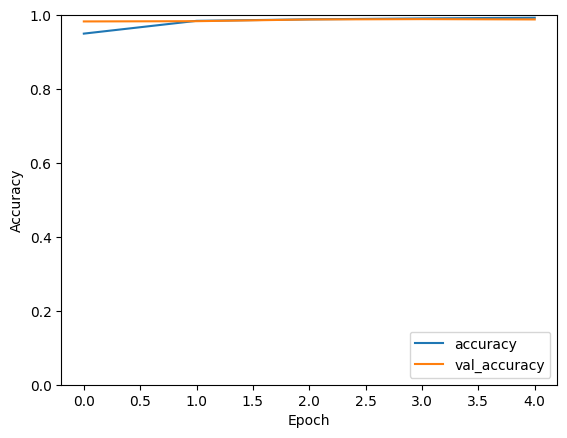

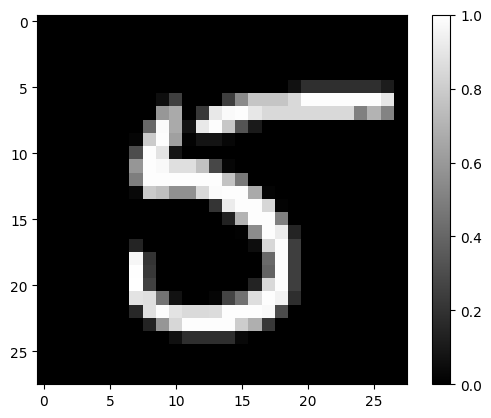

In [35]:
# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.figure()
plt.imshow(train_images[0].reshape(28, 28), cmap='gray', interpolation='nearest')
plt.colorbar()
plt.grid(False)
plt.show()
